# Importing Libraries

In [55]:
import pandas as pd
from matplotlib import pyplot as plt
import re
from sklearn import preprocessing
import numpy as np
import seaborn as sns
import time
from sklearn.preprocessing import MinMaxScaler  # , scale #, Imputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import classification_report, confusion_matrix


# Loading Dataset and understanding it

In [14]:
df = pd.read_csv("profiles.csv")
df = df.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)
print(df.head())
print(df.info())
print(df.columns)

    age       body_type               diet    drinks      drugs  \
0    22  a little extra  strictly anything  socially      never   
19   33        athletic    mostly anything  socially      never   
22   30             fit    mostly anything  socially      never   
94   29             fit    mostly anything  socially  sometimes   
98   31           curvy           anything  socially  sometimes   

                            education  \
0       working on college/university   
19     graduated from masters program   
22  graduated from college/university   
94  graduated from college/university   
98     graduated from masters program   

                                               essay0  \
0   about me:<br />\n<br />\ni would love to think...   
19  i relocated to san francisco half a year ago. ...   
22  i tend to think the same way a comedian does a...   
94  my names josh, and i create art for a living. ...   
98  one day i will mod r/hotchickswithspreadsheets...   

       

In [58]:
print(df['body_type'].value_counts())
print(df['diet'].value_counts())
print(df['drinks'].value_counts())
print(df['drugs'].value_counts())
print(df['smokes'].value_counts())
print(df['education'].value_counts())
print(df['ethnicity'].value_counts())
print(df['income'].value_counts())
print(df['job'].value_counts())
print(df['offspring'].value_counts())
print(df['orientation'].value_counts())
print(df['religion'].value_counts())
print(df['sex'].value_counts())
print(df['sign'].value_counts())
print(df['speaks'].value_counts())
print(df['status'].value_counts())
print(df['essay0'].head(3))
print(df['location'].value_counts())

average           1207
fit                906
athletic           799
curvy              448
thin               348
a little extra     322
skinny             125
full figured       102
overweight          60
jacked              40
used up             40
rather not say      10
Name: body_type, dtype: int64
mostly anything        2257
strictly anything       636
anything                522
mostly vegetarian       441
mostly other            155
strictly vegetarian     125
strictly other           68
vegetarian               45
mostly vegan             41
other                    39
strictly vegan           35
vegan                    16
mostly kosher            13
mostly halal              8
kosher                    2
strictly halal            2
strictly kosher           2
Name: diet, dtype: int64
socially       2958
rarely          581
often           396
not at all      386
very often       52
desperately      34
Name: drinks, dtype: int64
never        3423
sometimes     916
often     

# Data Visualization

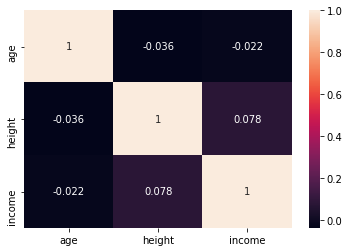

In [17]:
Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

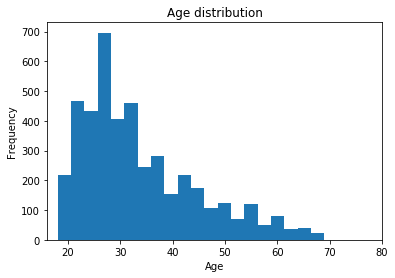

In [18]:
plt.hist(df.age, bins=20)
plt.title("Age distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.xlim(16, 80)
plt.show()


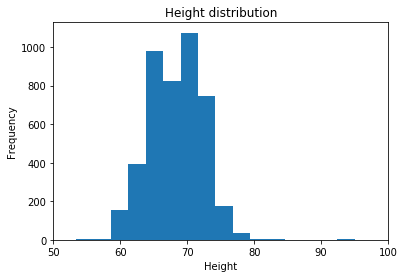

In [44]:
plt.hist(df.height, bins=20)
plt.title("Height distribution")
plt.xlabel("Height")
plt.ylabel("Frequency")
plt.xlim(50, 100)
plt.show()

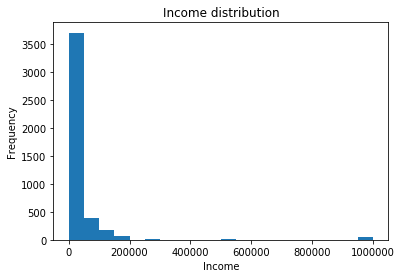

In [45]:
plt.hist(df.income, bins=20)
plt.title("Income distribution")
plt.xlabel("Income")
plt.ylabel("Frequency")
plt.show()

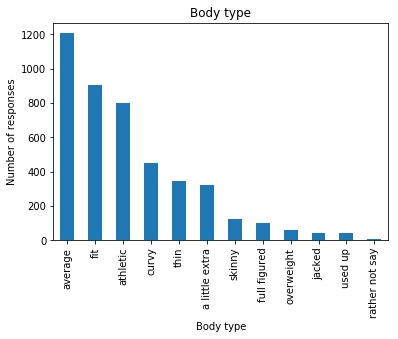

In [46]:
body_type = pd.value_counts(df['body_type'].values, sort=True)

ax = body_type.plot(kind='bar', title='Body type')
ax.set(xlabel='Body type', ylabel='Number of responses')
plt.show()

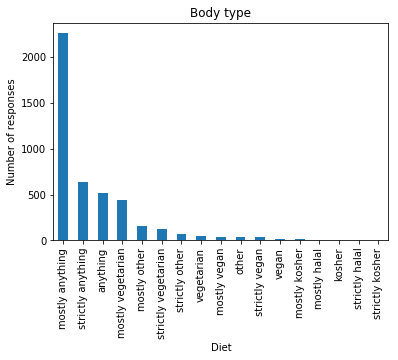

In [47]:
diet = pd.value_counts(df['diet'].values, sort=True)

ax = diet.plot(kind='bar', title='Body type')
ax.set(xlabel='Diet', ylabel='Number of responses')
plt.show()

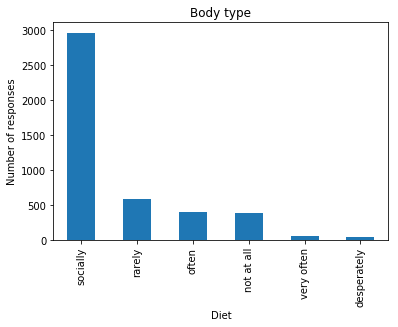

In [48]:
drinks = pd.value_counts(df['drinks'].values, sort=True)

ax = drinks.plot(kind='bar', title='Body type')
ax.set(xlabel='Diet', ylabel='Number of responses')
plt.show()

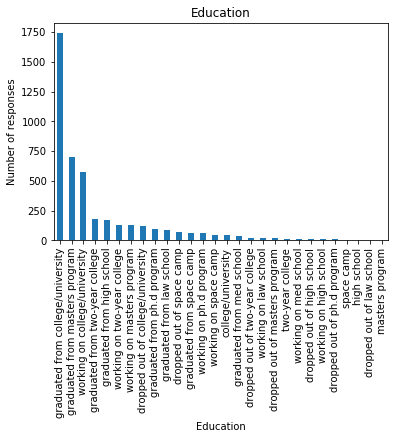

In [49]:
education = pd.value_counts(df['education'].values, sort=True)

ax = education.plot(kind='bar', title='Education')
ax.set(xlabel='Education', ylabel='Number of responses')
plt.show()

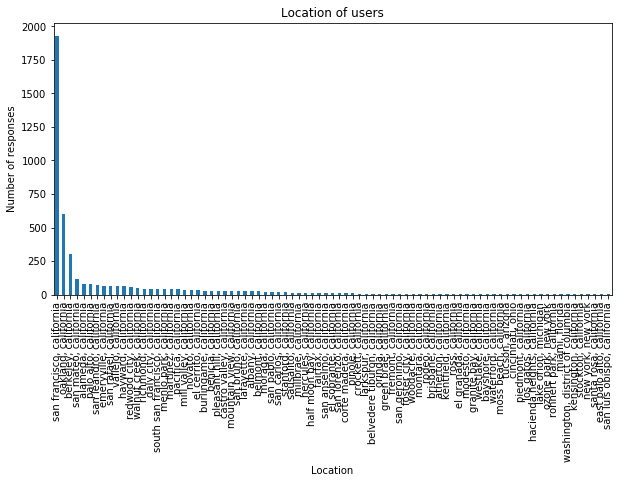

In [50]:
location = pd.value_counts(df['location'].values, sort=True)
ax = location.plot(kind='bar', title='Location of users', figsize=(10, 5))
ax.set(xlabel='Location', ylabel='Number of responses')
plt.show()

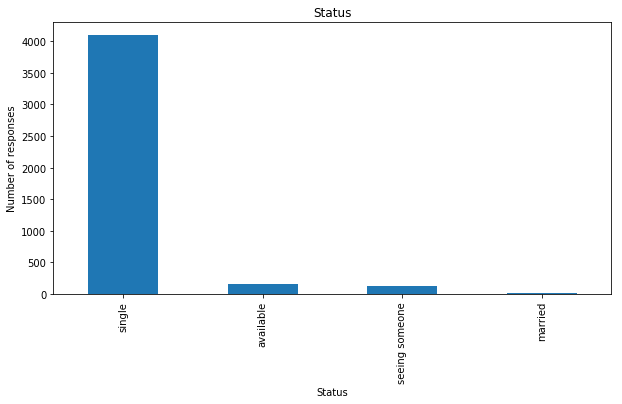

In [51]:
status = pd.value_counts(df['status'].values, sort=True)
ax = status.plot(kind='bar', title='Status', figsize=(10, 5))
ax.set(xlabel='Status', ylabel='Number of responses')
plt.show()

  sex  count
0   f   1937
1   m   2470


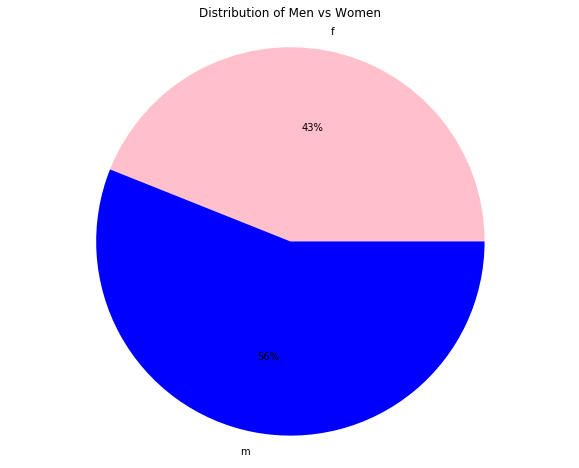

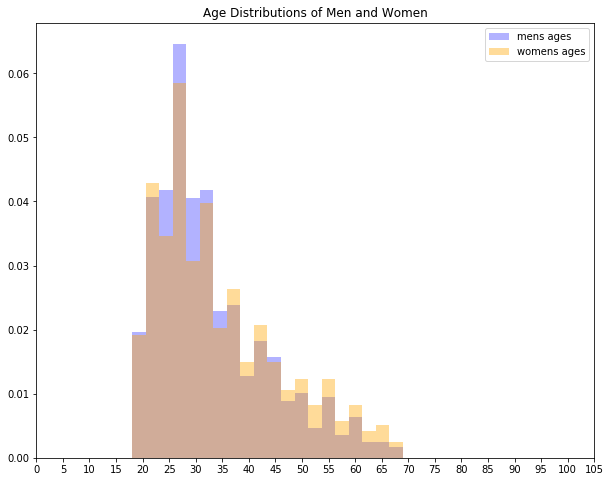

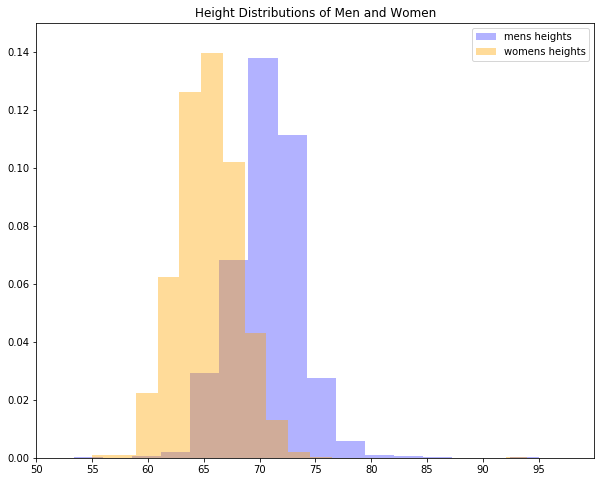

In [52]:

sex_df = df.groupby('sex')['age'].count().reset_index()
sex_df.rename(columns = {'age':'count'}, inplace = True)
print(sex_df)

plt.figure(figsize = (10,8))
ax1 = plt.subplot(1,1,1)
plt.pie(sex_df['count'], labels = sex_df['sex'], colors = ['pink', 'blue'], autopct = '%d%%')
plt.axis('equal')
plt.title('Distribution of Men vs Women')
plt.show()

#Age distributions
age_men = df[df['sex'] == 'm']['age']
age_women = df[df['sex'] == 'f']['age']

plt.close('all')
plt.figure(figsize = (10,8))
ax2 = plt.subplot(1,1,1)
plt.hist(age_men, alpha = 0.3, color = 'blue', normed = True, bins = 20)
plt.hist(age_women, alpha = 0.4, color = 'orange', normed = True, bins = 20)
plt.legend(['mens ages', 'womens ages'])
plt.title('Age Distributions of Men and Women')
ax2.set_xticks(range(0,110,5))
plt.show()

#Height distributions
height_men = df[df['sex'] == 'm']['height']
height_women = df[df['sex'] == 'f']['height']

plt.close('all')
plt.figure(figsize = (10,8))
ax3 = plt.subplot(1,1,1)
plt.hist(height_men, alpha = 0.3, color = 'blue', normed = True, bins = 20)
plt.hist(height_women, alpha = 0.4, color = 'orange', normed = True, bins = 20)
plt.axis([50,100, 0, 0.15])
plt.legend(['mens heights', 'womens heights'])
plt.title('Height Distributions of Men and Women')
ax3.set_xticks(range(50,100,5))
plt.show()

  sex orientation  counts
0   f    bisexual     209
1   f         gay     102
2   f    straight    1626
3   m    bisexual      65
4   m         gay     206
5   m    straight    2199


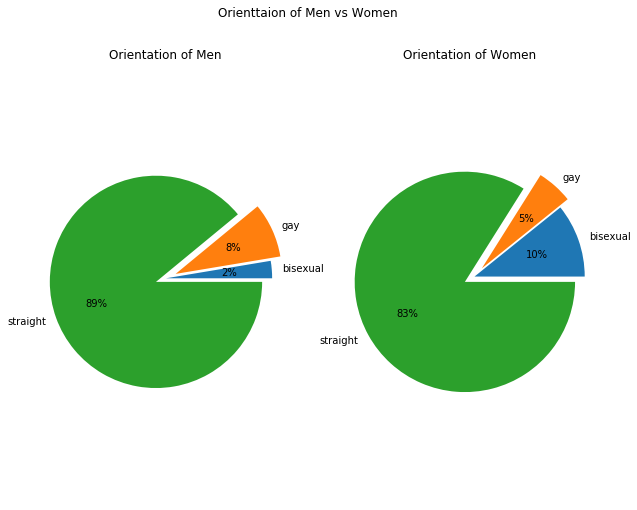

In [53]:
#Is sexual Orientation different by gender?

orientation = df.groupby(['sex', 'orientation'])['age'].count().reset_index()
orientation.rename(columns = {'age' : 'counts'}, inplace = True)
print(orientation)

explode = [0,0.1,0.1]

plt.close('all')
plt.figure(figsize = (10,8))
ax4 = plt.subplot(1,2,1)
plt.pie(orientation[orientation['sex'] == 'm']['counts'], labels = orientation[orientation['sex'] == 'm']['orientation'], autopct = '%d%%', explode = explode)
plt.axis('equal')
ax4.set_title('Orientation of Men')
ax5 = plt.subplot(1,2,2)
plt.pie(orientation[orientation['sex'] == 'f']['counts'], labels = orientation[orientation['sex'] == 'f']['orientation'], autopct = '%d%%', explode = explode)
plt.axis('equal')
ax5.set_title('Orientation of Women')
plt.suptitle('Orienttaion of Men vs Women')
plt.show()

# Data Augmentation

In [60]:
drink_mapping = {"not at all": 0, "rarely": 1, "socially": 2, "often": 3, "very often": 4, "desperately": 5}
smokes_mapping = {"no": 0, "trying to quit": 1, "when drinking": 2, "sometimes": 3, "yes": 4}
drugs_mapping = {"never": 0, "sometimes": 1, "often": 2}
sex_mapping = {"m": 0, "f": 1}
body_mapping = {"average": 0, "fit": 1, "athletic": 2, "thin": 3, "curvy": 4, "a little extra": 5, "skinny": 6,
                "full figured": 7, "overweight": 8, "jacked": 9, "used up": 10, "rather not say": 11}
'''
0: high school
1: 2-year college
2: undergrad
3: masters
4: phd
5: med school
6: law school
everything else NaN
'''
edu_mapping = {"graduated from college/university": 2,
               "graduated from masters program": 3,
               "working on college/university": np.nan,
               "working on masters program": np.nan,
               "graduated from two-year college": 1,
               "graduated from high school": 0,
               "graduated from ph.d program": 4,
               "graduated from law school": 6,
               "working on two-year college": np.nan,
               "dropped out of college/university": np.nan,
               "working on ph.d program": np.nan,
               "college/university": 2,
               "graduated from space camp": np.nan,
               "dropped out of space camp": np.nan,
               "graduated from med school": 5,
               "working on space camp": np.nan,
               "working on law school": 6,
               "two-year college": 1,
               "working on med school": np.nan,
               "dropped out of two-year college": np.nan,
               "dropped out of masters program": np.nan,
               "masters program": 3,
               "dropped out of ph.d program": np.nan,
               "dropped out of high school": np.nan,
               "high school": 0,
               "working on high school": np.nan,
               "space camp": np.nan,
               "ph.d program": 4,
               "law school": 6,
               "dropped out of law school": np.nan,
               "dropped out of med school": np.nan,
               "med school": 5}
'''
0: anything
1: vegetarian
2: vegan
3: kosher
4: halal
5: other
'''
diet_mapping = {"mostly anything": 0,
                "anything": 0,
                "strictly anything": 0,
                "mostly vegetarian": 1,
                "mostly other": 5,
                "strictly vegetarian": 1,
                "vegetarian": 1,
                "strictly other": 5,
                "mostly vegan": 2,
                "other": 5,
                "strictly vegan": 2,
                "vegan": 2,
                "mostly kosher": 3,
                "mostly halal": 4,
                "strictly kosher": 3,
                "strictly halal": 4,
                "kosher": 3,
                "halal": 4}

location_mapping = {}
for i in df.location:
    if i == "san francisco, california":
        location_mapping[i] = 0
    elif i == "oakland, california":
        location_mapping[i] = 1
    elif i == "berkeley, california":
        location_mapping[i] = 2
    else:
        location_mapping[i] = 3
 
df["drinks_code"] = df.drinks.map(drink_mapping)
df["smokes_code"] = df.smokes.map(smokes_mapping)
df["drugs_code"] = df.smokes.map(drugs_mapping)
df["sex_code"] = df.sex.map(sex_mapping)
df["body_code"] = df.body_type.map(body_mapping)
df["edu_code"] = df.education.map(edu_mapping)
df["diet_code"] = df.diet.map(diet_mapping)
df["location_code"] = df.location.map(location_mapping)

In [61]:
# data on total length of essay responses
essay_cols = ["essay0", "essay1", "essay2", "essay3", "essay4", "essay5", "essay6", "essay7", "essay8", "essay9"]
# Removing the NaNs
all_essays = df[essay_cols].replace(np.nan, '', regex=True)
# Combining the essays
all_essays = all_essays[essay_cols].apply(lambda x: ' '.join(x), axis=1)
df["essay_len"] = all_essays.apply(lambda x: len(x))

# average length of all essay responses
all_essays_split = all_essays.str.split()


def avg_word_length(essay):
    total_letters = 0
    num_words = 0
    if len(essay) == 0:
        return 0
    else:
        for word in essay:
            total_letters += len(word)
            num_words += 1
        return total_letters / num_words


df["avg_word_length"] = all_essays_split.apply(lambda x: avg_word_length(x))

In [62]:
# multiple linear regression
# can we predict income from somebody's sex, age, education, and length of their essay response
income_data = df[["income", "sex_code", "age", "edu_code", "essay_len", "location_code"]]
income_features = ["sex_code", "age", "edu_code", "essay_len", "location_code"]
income_data["income_corrected"] = income_data.income.apply(lambda x: np.nan if (x == -1) else x)
income_data_corrected = income_data[["income_corrected", "sex_code", "age", "edu_code", "essay_len", "location_code"]].reset_index()
filtered_income = income_data_corrected.dropna().reset_index()
income_labels = filtered_income["income_corrected"]
income_predictors = filtered_income[income_features]


c:\users\tushar\anaconda3\envs\conda_pip_env\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


#### Data splitting and prediction using Multiple Linear Regression

MLR of income based on age, sex education, and length of essay responses
Train Score: 0.039736010475198036
Test Score: 0.031130912880001246


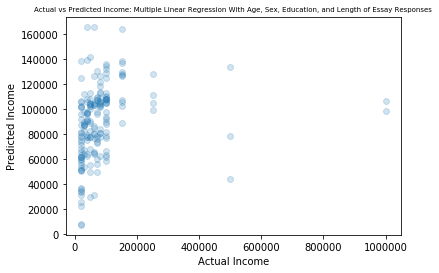

In [63]:
# separate training and testing sets
X_train, X_test, y_train, y_test = train_test_split(income_predictors, income_labels, test_size=0.2, random_state=1)

# train model
model = LinearRegression()
model.fit(X_train, y_train)
# model.score(X_train, y_train)

# score and visualize
print("MLR of income based on age, sex education, and length of essay responses")
print('Train Score:', model.score(X_train, y_train))
print('Test Score:', model.score(X_test, y_test))
y_predict = model.predict(X_test)
plt.scatter(y_test, y_predict, alpha=0.2)
plt.xlabel("Actual Income")
plt.ylabel("Predicted Income")
plt.title(
    "Actual vs Predicted Income: Multiple Linear Regression With Age, Sex, Education, and Length of Essay Responses",
    fontsize=7)
plt.savefig("MLR_income.png")
plt.show()


#### Classification using K-nearest neighbors

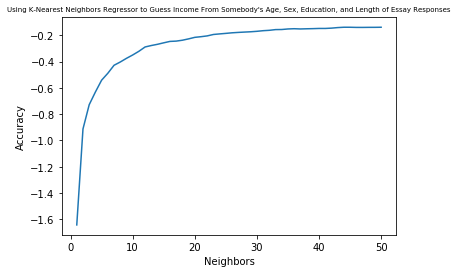

In [65]:
# k-nearest neighbors regressor
# can we predict income from somebody's sex, age, education, and length of their essay response
accuracy = []
ks = range(1, 51)

for k in ks:
    regressor = KNeighborsRegressor(n_neighbors=k, weights="distance")
    regressor.fit(X_train, y_train)
    accuracy.append(regressor.score(X_test, y_test))

plt.plot(ks, accuracy)
plt.xlabel("Neighbors")
plt.ylabel("Accuracy")
plt.title(
    "Using K-Nearest Neighbors Regressor to Guess Income From "
    "Somebody's Age, Sex, Education, and Length of Essay Responses",
    fontsize=7)
plt.savefig("KNN_r_income_ks.png")
plt.show()

#### Classification of income using SVM

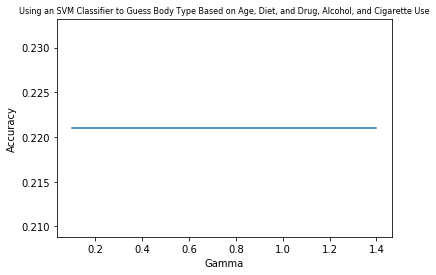

0.22099447513812154
SVC training set score: 0.22099447513812154
SVC test set score: 0.22099447513812154
[[40  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  0  0  0  0  0  0  0  0  0]
 [18  0  0  0  0  0  0  0  0  0  0  0]
 [15  0  0  0  0  0  0  0  0  0  0  0]
 [14  0  0  0  0  0  0  0  0  0  0  0]
 [17  0  0  1  0  0  0  0  0  0  0  0]
 [28  0  0  0  0  0  0  0  0  0  0  0]
 [11  0  0  0  0  0  0  0  0  0  0  0]
 [ 4  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0]]
              precision    recall  f1-score   support

     20000.0       0.22      1.00      0.36        40
     30000.0       0.00      0.00      0.00        11
     40000.0       0.00      0.00      0.00        17
     50000.0       0.00      0.00      0.00        18
     60000.0       0.00      0.00      0.00        15
     70000.0       0.00      0.00      0.00        14
     80000.0       0.00      0.00      0.00     

c:\users\tushar\anaconda3\envs\conda_pip_env\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
# can we use an SVM to pick body type?
# loop through different gamma values and relationship of gamma value to score
gamma_values = np.arange(0.1, 1.5, 0.1)
scores = []
gamma = 0
score = 0
for g in gamma_values:
    svc_classifier = SVC(kernel='rbf', gamma=g)
    svc_classifier.fit(X_train, y_train)
    current_score = svc_classifier.score(X_test, y_test)
    scores.append(current_score)
    # record highest score and gamma that gives us the highest score
    if current_score > score:
        gamma = g
        score = current_score

plt.plot(gamma_values, scores)
plt.title("Using an SVM Classifier to Guess Body Type Based on Age, Diet, and Drug, Alcohol, and Cigarette Use",
          fontsize=8)
plt.ylabel("Accuracy")
plt.xlabel("Gamma")
plt.savefig("SVM_body_type.png")
plt.show()

print(score)  # highest score, it's a gamma of 1.3

svc_classifier = SVC(kernel='rbf', gamma=1)
svc_classifier.fit(X_train, y_train)

svc_training_score = svc_classifier.score(X_test, y_test)
print("SVC training set score: %s" % svc_training_score)

svc_test_score = svc_classifier.score(X_test, y_test)
print("SVC test set score: %s" % svc_test_score)

svc_predictions = svc_classifier.predict(X_test)
print(confusion_matrix(y_test, svc_predictions))
print(classification_report(y_test, svc_predictions))


#### Prediction of income using Multinomial Bayes Classifier.

In [71]:
classifiermnb = MultinomialNB()
classifiermnb.fit(X_train, y_train)
print("Multinomial NB classifier for body type based on age and lifestyle:")
print(classifiermnb.score(X_test, y_test))


Multinomial NB classifier for body type based on age and lifestyle:
0.13812154696132597
